In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
train_dir = r"K:\ORGANISED DATSET\train"
test_dir = r"K:\ORGANISED DATSET\test"
img_size = (224, 224)  # Resize all images to 224x224
batch_size = 32

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=30,       # Random rotation up to 30 degrees
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode="nearest"      # Fill missing pixels
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"  # Binary classification (Benign vs Malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False  # No need to shuffle test data
)

Found 6326 images belonging to 2 classes.
Found 1582 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.5),  # Prevent overfitting

    Dense(1, activation="sigmoid")  # Output Layer (Binary Classification)
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [6]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25,
    callbacks=[early_stopping]
)

Epoch 1/25
198/198 [==============================] - 860s 4s/step - loss: 0.5013 - accuracy: 0.7814 - val_loss: 0.5311 - val_accuracy: 0.7067
Epoch 2/25
198/198 [==============================] - 819s 4s/step - loss: 0.4650 - accuracy: 0.8133 - val_loss: 0.4696 - val_accuracy: 0.8040
Epoch 3/25
198/198 [==============================] - 815s 4s/step - loss: 0.4412 - accuracy: 0.8305 - val_loss: 0.4275 - val_accuracy: 0.8420
Epoch 4/25
198/198 [==============================] - 812s 4s/step - loss: 0.4383 - accuracy: 0.8272 - val_loss: 0.4230 - val_accuracy: 0.8458
Epoch 5/25
198/198 [==============================] - 812s 4s/step - loss: 0.4211 - accuracy: 0.8347 - val_loss: 0.4139 - val_accuracy: 0.8470
Epoch 6/25
198/198 [==============================] - 810s 4s/step - loss: 0.4148 - accuracy: 0.8358 - val_loss: 0.4710 - val_accuracy: 0.7845
Epoch 7/25
198/198 [==============================] - 812s 4s/step - loss: 0.4120 - accuracy: 0.8418 - val_loss: 0.4161 - val_accuracy: 0.8534

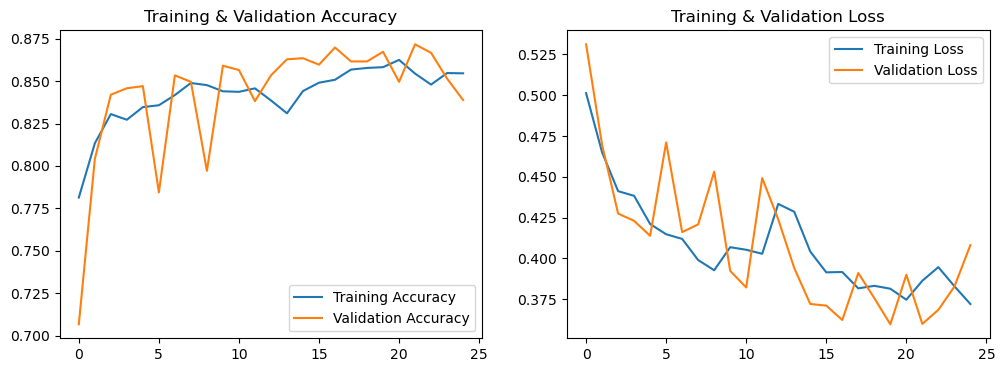

In [7]:
# Extract accuracy and loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(len(acc))

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training & Validation Accuracy")

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training & Validation Loss")
plt.show()

In [9]:
model.save(r"C:\Users\K M SASTRY\Desktop\CANCER PREDICTION\cnn_model_aug.h5")

C:\Users\K M SASTRY\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size correctly
img_size = 224  # Ensure img_size is an integer (if not, use (224,224))

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\K M SASTRY\Desktop\CANCER PREDICTION\cnn_model_aug.h5")

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    r"K:\ORGANISED DATSET\test",
    target_size=(img_size, img_size),  # Use (img_size, img_size) if img_size is an integer
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"❌ Test Loss: {test_loss:.4f}")


Found 1582 images belonging to 2 classes.
50/50 [==============================] - 84s 2s/step - loss: 0.3597 - accuracy: 0.8673

✅ Test Accuracy: 86.73%
❌ Test Loss: 0.3597


1/1 [==============================] - 1s 504ms/step


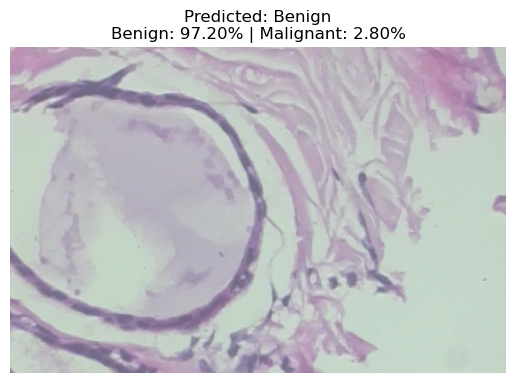

Prediction: Benign
Benign Confidence: 97.20%
Malignant Confidence: 2.80%


In [13]:
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    
    benign_confidence = (1 - prediction) * 100
    malignant_confidence = prediction * 100
    class_name = "Malignant" if prediction > 0.5 else "Benign"

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Predicted: {class_name}\nBenign: {benign_confidence:.2f}% | Malignant: {malignant_confidence:.2f}%")
    plt.show()

    # Print the confidence values
    print(f"Prediction: {class_name}")
    print(f"Benign Confidence: {benign_confidence:.2f}%")
    print(f"Malignant Confidence: {malignant_confidence:.2f}%")


loaded_model = tf.keras.models.load_model(r"C:\Users\K M SASTRY\Desktop\CANCER PREDICTION\cnn_model_aug.h5")
# Test the function with an image
predict_image(r"K:\ORGANISED DATSET\test\benign\SOB_B_A-14-22549CD-200-011.png", loaded_model)


1/1 [==============================] - 1s 501ms/step


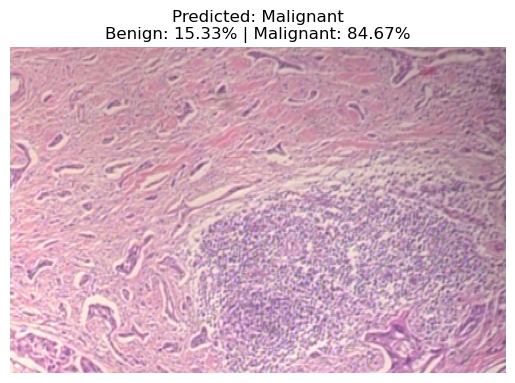

Prediction: Malignant
Benign Confidence: 15.33%
Malignant Confidence: 84.67%


In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define image size correctly
img_size = 224  # Ensure img_size is an integer

def predict_image(img_path, model):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(img_size, img_size))  
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    
    benign_confidence = (1 - prediction) * 100
    malignant_confidence = prediction * 100
    class_name = "Malignant" if prediction > 0.5 else "Benign"

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Predicted: {class_name}\nBenign: {benign_confidence:.2f}% | Malignant: {malignant_confidence:.2f}%")
    plt.show()

    # Print confidence values
    print(f"Prediction: {class_name}")
    print(f"Benign Confidence: {benign_confidence:.2f}%")
    print(f"Malignant Confidence: {malignant_confidence:.2f}%")

# Load trained model
loaded_model = tf.keras.models.load_model(r"C:\Users\K M SASTRY\Desktop\CANCER PREDICTION\cnn_model_aug.h5")

# Test the function with an image
predict_image(r"K:\ORGANISED DATSET\test\malignant\SOB_M_DC-14-10926-40-003.png", loaded_model)
